In [1]:
 # Sentiment Analysis in the Network Graph using RNN

In [7]:
# Step 1: Simulate Dataset & Preprocess

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

texts = [
    "I love this product", "This is amazing", "Absolutely terrible", "I hate it", "Not bad", 
    "Could be better", "Really good job", "Awful experience", "Okayish", "Best ever", "Disappointed",
    "So happy with it", "Neutral feeling", "Worst purchase"
]
labels = [1,1,0,0,2,2,1,0,2,1,0,1,2,0]  # 0: Negative, 1: Positive, 2: Neutral

# Tokenization
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
max_len = 10
padded = pad_sequences(sequences, maxlen=max_len)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=3)

# Split data
x_train, x_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)


In [8]:
# Step 2: Define RNN Model for Sentiment Classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

model = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=max_len),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/Users/rutulbhosale/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 3: Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=4, validation_split=0.2)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5000 - loss: 1.0736 - val_accuracy: 0.0000e+00 - val_loss: 1.1014
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4167 - loss: 1.0540 - val_accuracy: 0.0000e+00 - val_loss: 1.1149
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.7500 - loss: 0.9286 - val_accuracy: 0.3333 - val_loss: 1.1346
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6667 - loss: 0.9325 - val_accuracy: 0.0000e+00 - val_loss: 1.1807
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.5000 - loss: 0.9107 - val_accuracy: 0.0000e+00 - val_loss: 1.1917
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5833 - loss: 0.8064 - val_accuracy: 0.0000e+00 - val_loss: 1.2271
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.3333 - loss: 0.9615 - val_accuracy: 0.0000e+00 - val_loss: 1.2513
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8333 - loss: 0.8242 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


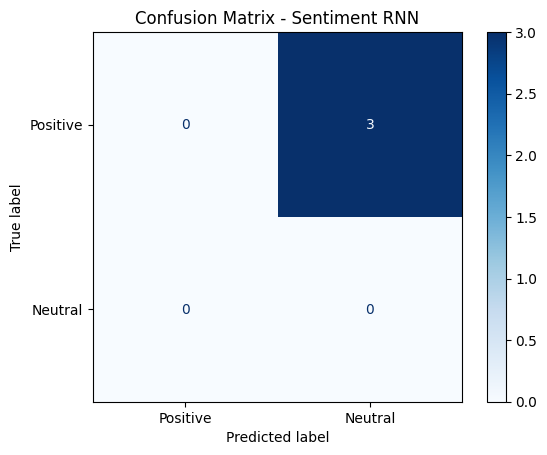

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict and get class labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Fix: Set labels only for classes present in test set
unique_labels = np.unique(np.concatenate((y_true_classes, y_pred_classes)))
label_map = ["Negative", "Positive", "Neutral"]
used_labels = [label_map[i] for i in unique_labels]

# Display corrected confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=used_labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Sentiment RNN")
plt.show()
